# Proprocessing dataset

In [69]:
with open('../dataset/train3_v4.csv') as f:
        print(f)

<_io.TextIOWrapper name='../dataset/train3_v4.csv' mode='r' encoding='cp950'>


In [70]:
import pandas as pd
import datasets
from datasets import load_dataset, Dataset, DatasetDict

Qdata_frame = pd.read_csv('../dataset/train3_v4.csv')
#Qdata_frame = pd.read_csv('../dataset/train3_v4.csv')


In [71]:
Qdata_frame['topic'] = Qdata_frame['topic'].apply(lambda x: x.strip().split(', '))

In [72]:
class_dict = {
'Algorithm Design': "Algorithm Design", 
'Communication Software and Protocols': "Networking and Internet Basics", 
'Computer System': "Computer System", 
'Data Manipulation and Analysis': "Data Manipulation and Analysis", 
'Data Organisation and Data Control': "Data Organisation and Data Control", 
'Database': "Spreadsheets and Databases", 
'Elementary Web Authoring': "Elementary Web Authoring", 
'Health and Ethical Issues': "Health and Ethical Issues", 
'Input and Output Devices': "Basic Machine Organisation", 
'Intellectual Property': "Intellectual Property", 
'Internet Services and Applications': "Internet Services and Applications", 
'Introduction to HTML': "Elementary Web Authoring", 
'Introduction to Information Processing': "Information Processing", 
'Multimedia Elements': "Multimedia Elements", 
'Number System': "Data Organisation and Data Control", 
'Problem- Formulation and Analysis': "Program Development", 
'Program Development': "Program Development", 
'Program Testing and Debugging': "Program Development", 
'Secondary Storage Devices': "Basic Machine Organisation", 
'Spreadsheet': "Spreadsheets and Databases", 
'System Software': "Computer System", 
'Networking and Internet Basics': 'Networking and Internet Basics',
'System Unit of a Computer System': "Basic Machine Organisation", 
'The Networking and Internet Basics': "Networking and Internet Basics", 
'Threats and Security on the Internet': "Threats and Security on the Internet", 
'Word Presentation': "Data Manipulation and Analysis"}

In [73]:
Qdata_frame['newTopic'] = Qdata_frame['topic'].apply(lambda topics: [class_dict[topic] for topic in topics])

In [74]:
# labelling
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
Qdf = Qdata_frame.join(pd.DataFrame(mlb.fit_transform(Qdata_frame['newTopic']), columns=mlb.classes_))

In [75]:
# split the train, test, and validation data
import sklearn
from sklearn.model_selection import train_test_split

Qdf_train, Qdf_remain = train_test_split(Qdf, train_size=0.8)
Qdf_valid, Qdf_test = train_test_split(Qdf_remain, test_size=0.5)

In [76]:
Qdf_train.shape

(648, 20)

In [77]:
Qdf_test.shape

(81, 20)

In [78]:
Qdf_valid.shape

(81, 20)

In [79]:
# change to hugging face dataset type
trainDS = Dataset.from_pandas(Qdf_train)
validDS = Dataset.from_pandas(Qdf_valid)
testDS = Dataset.from_pandas(Qdf_test)
ds = DatasetDict()
ds["train"] = trainDS
ds["valid"] = validDS
ds["test"] = testDS

labels_original = [label for label in ds['train'].features.keys() if label not in ['Unnamed: 0', 'String', '__index_level_0__']]

In [80]:
Qdf[labels_original].drop(["id", "type", "topic", "newTopic"], axis=1).sum().sort_values()

Elementary Web Authoring                27
Information Processing                  29
Internet Services and Applications      35
Data Manipulation and Analysis          37
Intellectual Property                   39
Health and Ethical Issues               41
Multimedia Elements                     50
Algorithm Design                        52
Computer System                         62
Networking and Internet Basics          69
Threats and Security on the Internet    70
Program Development                     73
Spreadsheets and Databases              84
Data Organisation and Data Control      90
Basic Machine Organisation              93
dtype: int64

In [81]:
Qdf_train[labels_original].drop(["id", "type", "topic", "newTopic"], axis=1).sum().sort_values()

Elementary Web Authoring                20
Information Processing                  23
Data Manipulation and Analysis          26
Internet Services and Applications      30
Intellectual Property                   31
Health and Ethical Issues               34
Multimedia Elements                     40
Algorithm Design                        44
Computer System                         44
Networking and Internet Basics          57
Program Development                     57
Threats and Security on the Internet    61
Spreadsheets and Databases              68
Basic Machine Organisation              72
Data Organisation and Data Control      74
dtype: int64

<AxesSubplot: >

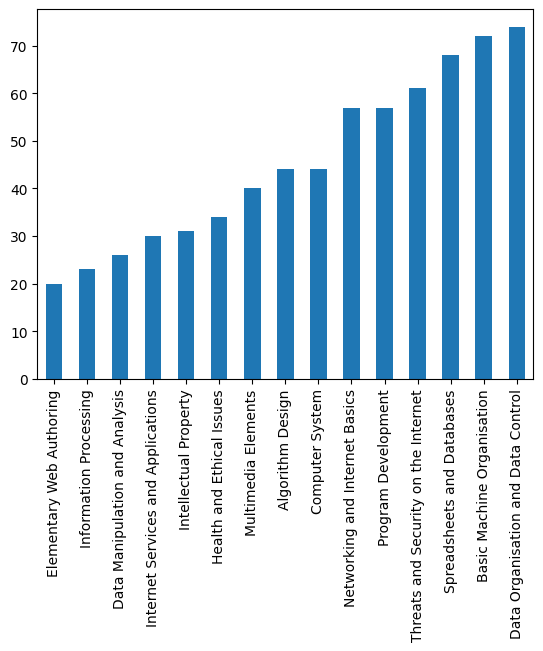

In [82]:
Qdf_train[labels_original].drop(["id", "type", "topic", "newTopic"], axis=1).sum().sort_values().plot.bar()

<AxesSubplot: >

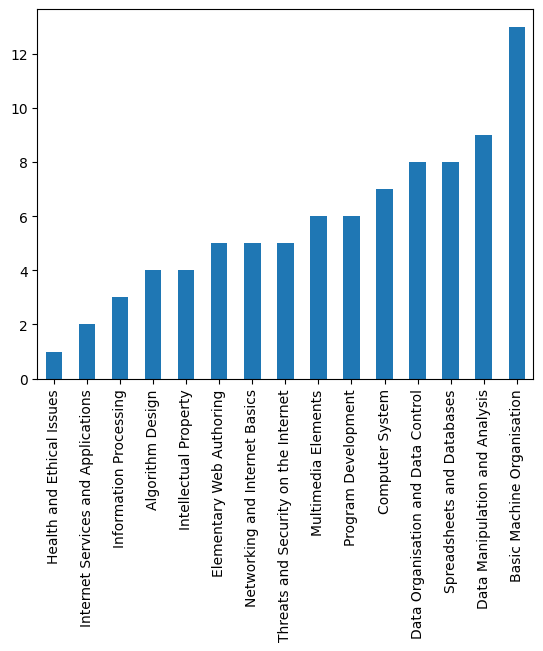

In [83]:
Qdf_valid[labels_original].drop(["id", "type", "topic", "newTopic"], axis=1).sum().sort_values().plot.bar()

In [84]:
Qdf_valid[labels_original].drop(["id", "type", "topic", "newTopic"], axis=1).sum().sort_values()

Health and Ethical Issues                1
Internet Services and Applications       2
Information Processing                   3
Algorithm Design                         4
Intellectual Property                    4
Elementary Web Authoring                 5
Networking and Internet Basics           5
Threats and Security on the Internet     5
Multimedia Elements                      6
Program Development                      6
Computer System                          7
Data Organisation and Data Control       8
Spreadsheets and Databases               8
Data Manipulation and Analysis           9
Basic Machine Organisation              13
dtype: int64

<AxesSubplot: >

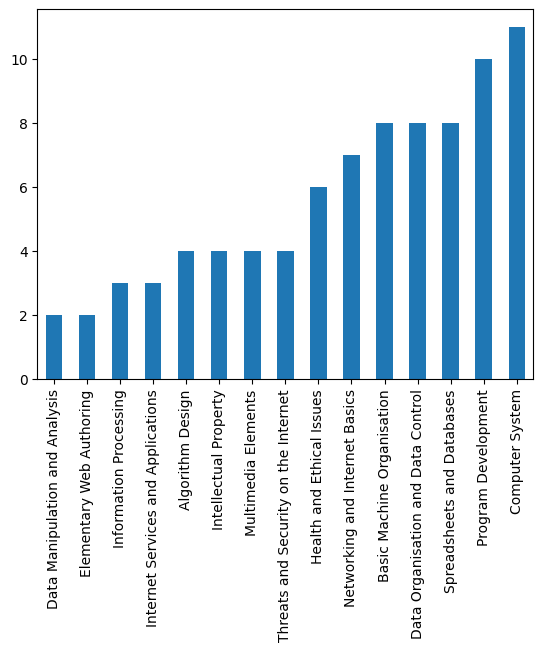

In [85]:
Qdf_test[labels_original].drop(["id", "type", "topic", "newTopic"], axis=1).sum().sort_values().plot.bar()

In [86]:
Qdf_test[labels_original].drop(["id", "type", "topic", "newTopic"], axis=1).sum().sort_values()

Data Manipulation and Analysis           2
Elementary Web Authoring                 2
Information Processing                   3
Internet Services and Applications       3
Algorithm Design                         4
Intellectual Property                    4
Multimedia Elements                      4
Threats and Security on the Internet     4
Health and Ethical Issues                6
Networking and Internet Basics           7
Basic Machine Organisation               8
Data Organisation and Data Control       8
Spreadsheets and Databases               8
Program Development                     10
Computer System                         11
dtype: int64

In [87]:
#  clear not used columns
columns = ds.column_names
columns_toRemove = ["id", "type", "topic", "newTopic"]
new_ds = ds.remove_columns(columns_toRemove)
print(new_ds)


DatasetDict({
    train: Dataset({
        features: ['String', 'Algorithm Design', 'Basic Machine Organisation', 'Computer System', 'Data Manipulation and Analysis', 'Data Organisation and Data Control', 'Elementary Web Authoring', 'Health and Ethical Issues', 'Information Processing', 'Intellectual Property', 'Internet Services and Applications', 'Multimedia Elements', 'Networking and Internet Basics', 'Program Development', 'Spreadsheets and Databases', 'Threats and Security on the Internet', '__index_level_0__'],
        num_rows: 648
    })
    valid: Dataset({
        features: ['String', 'Algorithm Design', 'Basic Machine Organisation', 'Computer System', 'Data Manipulation and Analysis', 'Data Organisation and Data Control', 'Elementary Web Authoring', 'Health and Ethical Issues', 'Information Processing', 'Intellectual Property', 'Internet Services and Applications', 'Multimedia Elements', 'Networking and Internet Basics', 'Program Development', 'Spreadsheets and Databases', '

In [88]:
labels_original = [label for label in new_ds['train'].features.keys() if label not in ['Unnamed: 0', 'String', '__index_level_0__']]

In [89]:
labels_original

['Algorithm Design',
 'Basic Machine Organisation',
 'Computer System',
 'Data Manipulation and Analysis',
 'Data Organisation and Data Control',
 'Elementary Web Authoring',
 'Health and Ethical Issues',
 'Information Processing',
 'Intellectual Property',
 'Internet Services and Applications',
 'Multimedia Elements',
 'Networking and Internet Basics',
 'Program Development',
 'Spreadsheets and Databases',
 'Threats and Security on the Internet']

In [90]:
# extract the labels
labels_original
id2label = {idx:label for idx, label in enumerate(labels_original)}
label2id = {label:idx for idx, label in enumerate(labels_original)}

<AxesSubplot: >

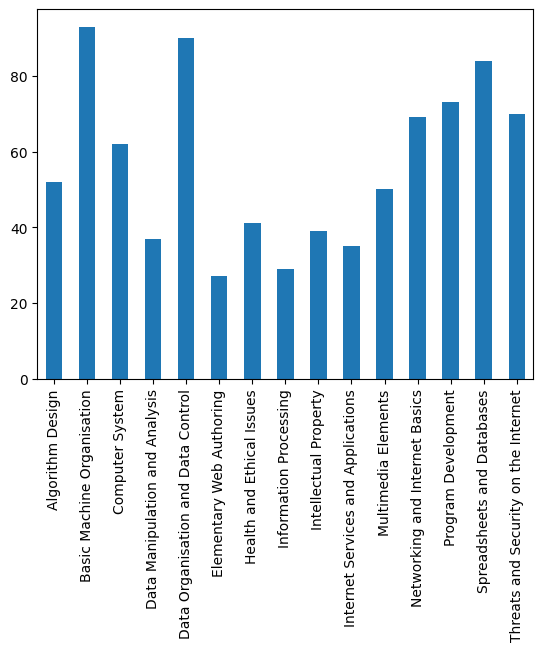

In [91]:
import matplotlib.pyplot as plt
Qdf[labels_original].sum().plot.bar()

In [92]:
#new_ds.save_to_disk('./encoded_data3_070')